In [69]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# get data
di = '/mnt/poseidon/remotesensing/arctic/data/vectors/Unmixing'
fi = 'randomPts_ndvi_timeseries_2019_2020.csv'
data = pd.read_csv(f'{di}/{fi}', index_col=0)

In [48]:
data

,2019-01-01,2019-01-16,2019-01-31,2019-02-15,2019-03-02,2019-03-17,2019-04-01,2019-04-16,2019-05-01,2019-05-16,...,2020-07-29,2020-08-13,2020-08-28,2020-09-12,2020-09-27,2020-10-12,2020-10-27,2020-11-11,2020-11-26,2020-12-11
0,NaN,NaN,NaN,0.009610,0.001309,-0.004962,-0.010213,-0.015566,-0.040396,-0.033394,...,0.369055,0.441325,0.435823,0.012298,NaN,0.022744,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.024228,-0.020768,-0.026188,-0.017498,-0.005884,-0.065152,-0.050581,...,0.163701,0.465670,NaN,0.460270,0.034764,0.030869,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.007634,NaN,0.012567,-0.011047,-0.003774,0.125396,0.457099,...,0.630048,0.558768,0.320405,0.393334,0.172287,0.029965,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.016598,-0.003769,-0.013170,-0.012652,-0.009870,-0.048001,NaN,...,0.341089,0.489583,0.178151,0.255780,0.074736,0.042668,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,-0.014975,-0.014826,-0.018057,-0.022493,-0.006656,-0.031834,-0.102710,...,-0.332932,-0.065099,0.114053,-0.793651,-0.001058,0.025492,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,NaN,NaN,-0.040150,-0.010998,-0.025780,-0.019821,-0.010963,-0.048143,0.340705,...,0.592979,0.263720,0.452046,-0.032206,0.004651,-0.035345,NaN,NaN,NaN,NaN
449,NaN,NaN,NaN,0.031622,0.004898,-0.022976,0.015614,0.017631,0.444056,0.510354,...,0.360395,0.558037,0.272735,0.542939,0.324060,0.231319,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,0.010154,-0.010291,-0.011811,-0.001653,-0.011301,-0.047268,0.395653,...,0.693881,0.488487,0.492932,0.562218,0.018783,0.039132,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,0.024492,0.000215,-0.017322,-0.019084,-0.021262,-0.038027,-0.025018,...,0.414650,0.446843,0.178167,0.394597,-0.014981,-0.005872,NaN,NaN,NaN,NaN


In [65]:
# detrend the timeseries
def detrend_row(row, cols):
    x = np.arange(0,len(cols))
    y = row.values
    not_nan_ind = ~np.isnan(y)
    m, b, r_val, p_val, std_err = stats.linregress(x[not_nan_ind],y[not_nan_ind])
    detrend_y = y - (m*x + b)
    return detrend_y
    
cols = data.columns.to_numpy()
detrended = data.apply(lambda row: detrend_row(row, cols), axis=1)

In [66]:
detrended

0      [nan, nan, nan, -0.11006151415838486, -0.12200...
1      [nan, nan, nan, -0.16055623444298409, -0.20780...
2      [nan, nan, nan, -0.26758433316384744, nan, -0....
3      [nan, nan, nan, -0.0887321932389581, -0.111162...
4      [nan, nan, nan, 0.0587787204069887, 0.06276862...
                             ...                        
448    [nan, nan, nan, -0.23537150025263587, -0.20840...
449    [nan, nan, nan, -0.2466312568780652, -0.277441...
450    [nan, nan, nan, -0.23951872938471333, -0.26369...
451    [nan, nan, nan, -0.1361845331581521, -0.162518...
452    [nan, nan, nan, -0.2578834276947113, -0.285894...
Length: 453, dtype: object

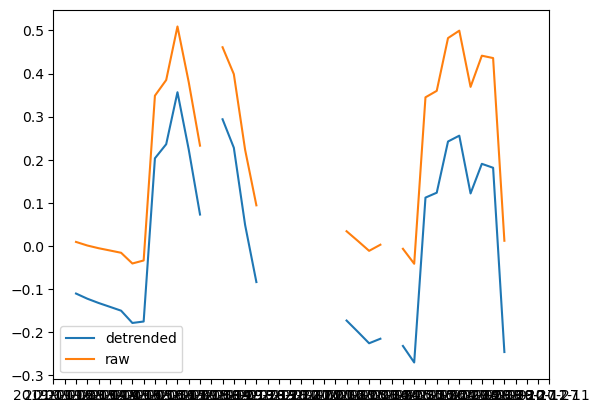

In [72]:
plt.plot(detrended.iloc[0], label='detrended')
plt.plot(data.iloc[0], label='raw')
plt.legend()

In [ ]:
# get harmonic info
frequencies = np.arange(1,3)
# need to get date strings to datetime objects first
time = date * (np.pi**2 / (1000 * 60 * 60 * 24 * 365))
cos = np.cos(time * frequencies)
sin = np.sin(time * frequencies)